In [9]:
import pandas as pd
df=pd.read_csv(r"C:\Tekworks\Day 8\transactions.csv")
df


,t_date,cust_id,t_amt,services,products_used,city,state,t_details
0,06-26-2015,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit
1,05-26-2015,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit
2,06-01-2015,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit
3,06-05-2015,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit
4,12-17-2015,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit
...,...,...,...,...,...,...,...,...
49995,09-18-2015,4005664,53.95,Games,Dice Games,Irving,Texas,credit
49996,10-02-2015,4007287,163.81,Games,Poker Chips & Sets,Kansas City,Missouri,credit
49997,05-03-2015,4003954,35.85,Racquet Sports,Squash,New Orleans,Louisiana,cash
49998,10-23-2015,4007843,180.41,Gymnastics,Vaulting Horses,Berkeley,California,credit


In [10]:
#1.What is the total sales amount across all transactions
total_sales = df["t_amt"].sum()
print("Total sales amount:", total_sales)

Total sales amount: 5110820.54


In [23]:
#2.Which month had the highest total transactiom amount

df["t_date"] = pd.to_datetime(df["t_date"], format="%m-%d-%Y")
df.groupby(df["t_date"].dt.month_name())["t_amt"].sum().idxmax()


'March'

In [24]:
#3.What is the average transaction amount per customer?
df.groupby('cust_id')['t_amt'].mean().mean()



np.float64(101.97791991921538)

In [ ]:
#4.What is the trend of total sales over months?
df["t_date"] = pd.to_datetime(df["t_date"], format="%m-%d-%Y")
df.groupby(df["t_date"].dt.month_name())["t_amt"].sum()


t_date
April        420695.24
August       434255.01
December     421490.73
February     395262.37
January      438165.76
July         439560.80
June         421074.55
March        444664.24
May          432627.58
November     408846.35
October      424856.28
September    429321.63
Name: t_amt, dtype: float64

In [31]:
#5.What is the highest single transaction amount recorded?
df['t_amt'].max()

200.0

In [37]:
#6.Which service category contributes the most to total revenue?
df.groupby('services')['t_amt'].sum().idxmax()


'Outdoor Recreation'

In [39]:
#7.Which product generated the highest revenue?
df.groupby('products_used')['t_amt'].sum().idxmax()


'Yoga & Pilates'

In [43]:
#8.How does the average transaction amount vary between services?
df.groupby('services')['t_amt'].mean().sort_values(ascending=False)



services
Exercise & Fitness        103.660247
Racquet Sports            103.647461
Air Sports                103.455104
Indoor Games              103.074684
Dancing                   102.907512
Team Sports               102.738998
Gymnastics                102.385901
Games                     102.272968
Jumping                   102.155171
Water Sports              101.899975
Outdoor Play Equipment    101.281196
Winter Sports             101.217718
Combat Sports             101.061761
Outdoor Recreation        100.999480
Puzzles                   100.595997
Name: t_amt, dtype: float64

In [44]:
#9.How many unique customers made purchases?
df['cust_id'].nunique()


9926

In [49]:
#10.Which customers have spent the most overall?
df.groupby('cust_id')['t_amt'].sum().sort_values(ascending=False).head()


cust_id
4009485    1973.30
4006425    1732.09
4000221    1671.47
4003228    1640.63
4006606    1628.94
Name: t_amt, dtype: float64

In [4]:
import re
text = "hi my id sumit@gmail.com,and nagul@tekwork.com"
emails = re.findall(r'\S+@\S+', text)
for email in emails:
    print(email)

sumit@gmail.com,and
nagul@tekwork.com


In [ ]:
#11.What is the average number of transactions per customer?
import pandas as pd
# Load dataset
df = pd.read_csv("transactions.csv")
# Calculate average number of transactions per customer
avg_transactions = df.groupby('cust_id').size().mean()
print("Average Number of Transactions per Customer:", avg_transactions)


Average Number of Transactions per Customer: 5.037275841225066


In [6]:
#12.Are there customers who made multiple purchases in different categories?
multi_service_customers = df.groupby('cust_id')['services'].nunique()
print("\nCustomers Purchasing Multiple Services:")
print(multi_service_customers[multi_service_customers > 1].count())




Customers Purchasing Multiple Services:
9488


In [10]:
#13.What percentage of customers are repeat buyers?
# Total unique customers
total_customers = df['cust_id'].nunique()
# Count transactions per customer
transaction_counts = df.groupby('cust_id').size()
# Repeat buyers (more than 1 transaction)
repeat_buyers = transaction_counts[transaction_counts > 1].count()
# Percentage calculation
repeat_percentage = (repeat_buyers / total_customers) * 100
print("Total Customers:", total_customers)
print("Repeat Buyers:", repeat_buyers)
print("Percentage of Repeat Buyers:", repeat_percentage)


Total Customers: 9926
Repeat Buyers: 9585
Percentage of Repeat Buyers: 96.5645778762845


In [11]:
#14.Which product category has the highest total sales?
print("\nMost Popular Service:")
print(df['services'].value_counts().head(1))



Most Popular Service:
services
Outdoor Recreation    8383
Name: count, dtype: int64


In [12]:
#15.Which services are most popular by transaction count?
print("\nMost Frequent Product per Service:")
print(df.groupby(['services','products_used']).size().sort_values(ascending=False).head())




Most Frequent Product per Service:
services                products_used             
Outdoor Recreation      Lawn Games                    466
Outdoor Play Equipment  Swing Sets                    464
Outdoor Recreation      Golf                          452
Exercise & Fitness      Cardio Machine Accessories    445
                        Yoga & Pilates                444
dtype: int64


In [13]:
#16.For each service, which product type is purchased most frequently?
print("\nAverage Transaction per Product:")
print(df.groupby('products_used')['t_amt'].mean())



Average Transaction per Product:
products_used
Abdominal Equipment    105.362798
Air Hockey             103.775478
Air Suits              101.421832
Archery                 97.345564
Badminton              108.441138
                          ...    
Wetsuits               102.042775
Whitewater Rafting     102.877744
Windsurfing            104.161453
Wrestling               97.895364
Yoga & Pilates         107.668784
Name: t_amt, Length: 125, dtype: float64


In [14]:
#17.What is the average transaction amount per product type?
state_sales = df.groupby('state')['t_amt'].sum().sort_values(ascending=False)
print("\nState with Highest Sales:")
print(state_sales.head(1))


State with Highest Sales:
state
California    702346.23
Name: t_amt, dtype: float64


In [15]:
#18.Are there specific services where customers spend significantly more?
print("\nCity with Highest Transactions:")
print(df['city'].value_counts().head(1))


City with Highest Transactions:
city
Pasadena    939
Name: count, dtype: int64


In [16]:
#19.Which state has the highest total sales?
print("\nAverage Spending per State:")
print(df.groupby('state')['t_amt'].mean())



Average Spending per State:
state
Alabama                 102.487049
Arizona                 102.172241
California              102.652182
Colorado                101.537415
Connecticut              99.982108
District of Columbia    103.800334
Florida                 103.136567
Georgia                 102.330675
Hawaii                  101.536667
Idaho                    98.969538
Illinois                100.166315
Indiana                 100.712664
Iowa                    103.100727
Kansas                  101.436926
Kentucky                104.130392
Louisiana               103.466335
Maryland                100.506913
Massachusetts           104.541571
Michigan                101.547777
Minnesota               103.465157
Mississippi             101.214926
Missouri                100.969040
Nebraska                101.955690
Nevada                  105.434718
New Jersey              103.438005
New York                100.259452
North Carolina          103.033172
Ohio                

In [19]:
#20.Which city records the highest number of transactions?
# Count transactions per city
city_transactions = df['city'].value_counts()
# City with highest transactions
top_city = city_transactions.head(1)
print("City with Highest Number of Transactions:")
print(top_city)


City with Highest Number of Transactions:
city
Pasadena    939
Name: count, dtype: int64


In [21]:
#21.What is the average spending per transaction in each state?
# Calculate average spending per transaction for each state
avg_spending_state = df.groupby('state')['t_amt'].mean().sort_values(ascending=False)
print("Average Spending per Transaction in Each State:")
print(avg_spending_state)



Average Spending per Transaction in Each State:
state
Nevada                  105.434718
Oklahoma                104.995771
Virginia                104.976206
Massachusetts           104.541571
Utah                    104.507560
Kentucky                104.130392
District of Columbia    103.800334
South Carolina          103.540065
Louisiana               103.466335
Minnesota               103.465157
New Jersey              103.438005
Florida                 103.136567
Iowa                    103.100727
North Carolina          103.033172
Pennsylvania            102.776034
California              102.652182
Alabama                 102.487049
Oregon                  102.438143
Georgia                 102.330675
Arizona                 102.172241
Nebraska                101.955690
Wisconsin               101.953159
Michigan                101.547777
Colorado                101.537415
Hawaii                  101.536667
Kansas                  101.436926
Washington              101.401603
T

In [22]:
#22.Are certain services more popular in specific states?
# Count transactions by State and Service
state_service_popularity = df.groupby(['state', 'services']).size().reset_index(name='Transaction_Count')
# Sort to see most popular services in each state
state_service_popularity = state_service_popularity.sort_values(
    ['state', 'Transaction_Count'], ascending=[True, False]
)
print(state_service_popularity)


         state            services  Transaction_Count
9      Alabama  Outdoor Recreation                191
3      Alabama  Exercise & Fitness                160
12     Alabama         Team Sports                131
13     Alabama        Water Sports                124
4      Alabama               Games                 80
..         ...                 ...                ...
562  Wisconsin             Jumping                 40
566  Wisconsin      Racquet Sports                 34
555  Wisconsin          Air Sports                 20
565  Wisconsin             Puzzles                 15
557  Wisconsin             Dancing                  4

[570 rows x 3 columns]


In [23]:
#23.Which states buy the most Outdoor Recreation products?
# Filter Outdoor Recreation transactions
outdoor_df = df[df['services'] == "Outdoor Recreation"]
# Group by state and calculate total sales
state_outdoor_sales = outdoor_df.groupby('state')['t_amt'].sum().sort_values(ascending=False)
print("States Buying the Most Outdoor Recreation Products:")
print(state_outdoor_sales)


States Buying the Most Outdoor Recreation Products:
state
California              120605.09
Texas                    81616.93
Florida                  47959.38
Oregon                   32892.83
Tennessee                31080.93
Ohio                     30917.35
Washington               29612.15
Colorado                 27605.07
Massachusetts            26458.03
Arizona                  24426.25
Illinois                 22933.09
Missouri                 22301.50
New Jersey               22091.40
Wisconsin                19378.03
Virginia                 18931.03
Alabama                  18197.03
Minnesota                17928.51
Kentucky                 16532.71
South Carolina           16050.35
Georgia                  15912.77
Kansas                   15869.04
Pennsylvania             15271.72
Nebraska                 14962.41
Connecticut              14592.22
North Carolina           14530.52
Nevada                   14427.91
New York                 14393.36
Utah                    

In [24]:
#24.Compare average spending between California and Texas customers.
# Filter only California and Texas
ca_tx = df[df['state'].isin(['California', 'Texas'])]
# Calculate average spending
avg_spending = ca_tx.groupby('state')['t_amt'].mean()
print("Average Spending Comparison:")
print(avg_spending)


Average Spending Comparison:
state
California    102.652182
Texas         101.379891
Name: t_amt, dtype: float64


In [25]:
#25.Which quarter of the year saw the highest sales?
# Convert date column
df['t_date'] = pd.to_datetime(df['t_date'])
# Create Quarter column
df['Quarter'] = df['t_date'].dt.quarter
# Calculate total sales per quarter
quarter_sales = df.groupby('Quarter')['t_amt'].sum().sort_values(ascending=False)
print("Total Sales by Quarter:")
print(quarter_sales)


Total Sales by Quarter:
Quarter
3    1303137.44
1    1278092.37
2    1274397.37
4    1255193.36
Name: t_amt, dtype: float64


In [ ]:
#26.How does total sales vary month by month?
import pandas as pd
# Extract Month Name and Month Number
df['Month'] = df['t_date'].dt.month
df['Month_Name'] = df['t_date'].dt.month_name()
# Calculate total sales per month (sorted properly by month number)
monthly_sales = df.groupby(['Month', 'Month_Name'])['t_amt'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month')
print("Total Sales Month by Month:")
print(monthly_sales[['Month_Name', 't_amt']])



Total Sales Month by Month:
   Month_Name      t_amt
0     January  438165.76
1    February  395262.37
2       March  444664.24
3       April  420695.24
4         May  432627.58
5        June  421074.55
6        July  439560.80
7      August  434255.01
8   September  429321.63
9     October  424856.28
10   November  408846.35
11   December  421490.73


In [27]:
#27.What is the total number of transactions per month?
# Convert date column
df['t_date'] = pd.to_datetime(df['t_date'])
# Extract Month number and name
df['Month'] = df['t_date'].dt.month
df['Month_Name'] = df['t_date'].dt.month_name()
# Count transactions per month (sorted correctly)
monthly_transactions = (
    df.groupby(['Month', 'Month_Name'])
      .size()
      .reset_index(name='Transaction_Count')
      .sort_values('Month')
)
print("Total Number of Transactions per Month:")
print(monthly_transactions[['Month_Name', 'Transaction_Count']])


Total Number of Transactions per Month:
   Month_Name  Transaction_Count
0     January               4268
1    February               3834
2       March               4360
3       April               4175
4         May               4205
5        June               4171
6        July               4252
7      August               4250
8   September               4160
9     October               4181
10   November               3994
11   December               4150


Matplotlib is building the font cache; this may take a moment.


Monthly Sports Equipment Sales:
   Month_Name     t_amt
0     January  52331.01
1    February  48418.82
2       March  55662.86
3       April  53772.54
4         May  52269.35
5        June  52236.93
6        July  48666.12
7      August  57153.34
8   September  53187.57
9     October  51594.81
10   November  45426.10
11   December  46741.93


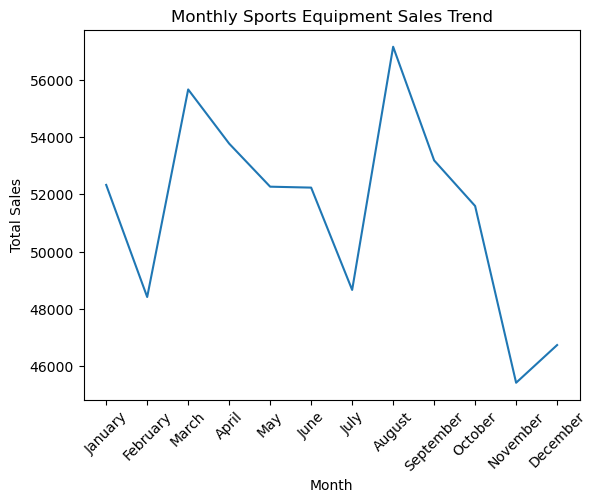

In [29]:
#28.Is there a particular season when sports equipment sales spike?
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column
df['t_date'] = pd.to_datetime(df['t_date'])
# Extract month and quarter
df['Month'] = df['t_date'].dt.month
df['Month_Name'] = df['t_date'].dt.month_name()
df['Quarter'] = df['t_date'].dt.quarter
# Filter Sports Equipment category
sports_df = df[df['services'] == "Team Sports"]   # Sports equipment falls under Team Sports
# Monthly sales
monthly_sports = (
    sports_df.groupby(['Month', 'Month_Name'])['t_amt']
    .sum()
    .reset_index()
    .sort_values('Month')
)
print("Monthly Sports Equipment Sales:")
print(monthly_sports[['Month_Name', 't_amt']])
# Plot
plt.figure()
plt.plot(monthly_sports['Month_Name'], monthly_sports['t_amt'])
plt.xticks(rotation=45)
plt.title("Monthly Sports Equipment Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [31]:
#29.How many transactions were done using credit?
credit_transactions = df[df['t_details'] == "credit"].shape[0]
print("Number of Credit Transactions:", credit_transactions)

Number of Credit Transactions: 43151


In [32]:
#30.What is the total revenue generated from credit transactions?
# Filter credit transactions
credit_df = df[df['t_details'] == "credit"]
# Calculate total revenue
total_credit_revenue = credit_df['t_amt'].sum()
print("Total Revenue from Credit Transactions:", total_credit_revenue)


Total Revenue from Credit Transactions: 4923134.93


In [33]:
#31.Is there a difference in average spending between credit and debit customers?
avg_spending = df.groupby('t_details')['t_amt'].mean()
print("Average Spending by Payment Type:")
print(avg_spending)

Average Spending by Payment Type:
t_details
cash       27.403360
credit    114.090865
Name: t_amt, dtype: float64


In [34]:
#32.Which states or cities should the company focus on for marketing high-value products?
# Calculate overall average transaction amount
overall_avg = df['t_amt'].mean()
# Filter high-value transactions (above average)
high_value_df = df[df['t_amt'] > overall_avg]
# High-value sales by state
state_high_value = (
    high_value_df.groupby('state')['t_amt']
    .sum()
    .sort_values(ascending=False)
)
# High-value sales by city
city_high_value = (
    high_value_df.groupby('city')['t_amt']
    .sum()
    .sort_values(ascending=False)
)
print("Top States for High-Value Products:")
print(state_high_value.head())
print("\nTop Cities for High-Value Products:")
print(city_high_value.head())



Top States for High-Value Products:
state
California    522775.00
Texas         398854.37
Florida       204829.01
Oregon        138305.68
Ohio          137873.50
Name: t_amt, dtype: float64

Top Cities for High-Value Products:
city
Pasadena       70979.51
Columbia       70132.88
Kansas City    69389.77
Columbus       67338.80
Long Beach     40223.33
Name: t_amt, dtype: float64


In [35]:
#33.should more inventory be stocked for Exercise & Fitness products given their popularity?
# Filter Exercise & Fitness
fitness_df = df[df['services'] == "Exercise & Fitness"]
# 1️.Transaction count
fitness_count = fitness_df.shape[0]
# 2️.Total revenue
fitness_revenue = fitness_df['t_amt'].sum()
# 3️.Average transaction amount
fitness_avg = fitness_df['t_amt'].mean()
# Compare with other services
service_summary = df.groupby('services')['t_amt'].agg(['count', 'sum', 'mean']).sort_values('count', ascending=False)
print("Exercise & Fitness Transaction Count:", fitness_count)
print("Exercise & Fitness Total Revenue:", fitness_revenue)
print("Exercise & Fitness Average Spending:", fitness_avg)
print("\nService Comparison:")
print(service_summary)



Exercise & Fitness Transaction Count: 7394
Exercise & Fitness Total Revenue: 766463.87
Exercise & Fitness Average Spending: 103.66024749797133

Service Comparison:
                        count        sum        mean
services                                            
Outdoor Recreation       8383  846678.64  100.999480
Exercise & Fitness       7394  766463.87  103.660247
Team Sports              6010  617461.38  102.738998
Water Sports             5219  531815.97  101.899975
Games                    3666  374932.70  102.272968
Gymnastics               3196  327225.34  102.385901
Winter Sports            3181  321973.56  101.217718
Outdoor Play Equipment   2910  294728.28  101.281196
Indoor Games             2799  288506.04  103.074684
Jumping                  2015  205842.67  102.155171
Combat Sports            1630  164730.67  101.061761
Racquet Sports           1611  166976.06  103.647461
Air Sports                960   99316.90  103.455104
Puzzles                   612   61564.75 

In [36]:
#34.Are there product categories with high sales but low average transaction amounts?
# Group by service/category
category_summary = (
    df.groupby('services')['t_amt']
      .agg(['count', 'sum', 'mean'])
      .sort_values('sum', ascending=False)
)
print("Category Summary (Count, Total Sales, Average Transaction):")
print(category_summary)

Category Summary (Count, Total Sales, Average Transaction):
                        count        sum        mean
services                                            
Outdoor Recreation       8383  846678.64  100.999480
Exercise & Fitness       7394  766463.87  103.660247
Team Sports              6010  617461.38  102.738998
Water Sports             5219  531815.97  101.899975
Games                    3666  374932.70  102.272968
Gymnastics               3196  327225.34  102.385901
Winter Sports            3181  321973.56  101.217718
Outdoor Play Equipment   2910  294728.28  101.281196
Indoor Games             2799  288506.04  103.074684
Jumping                  2015  205842.67  102.155171
Racquet Sports           1611  166976.06  103.647461
Combat Sports            1630  164730.67  101.061761
Air Sports                960   99316.90  103.455104
Puzzles                   612   61564.75  100.595997
Dancing                   414   42603.71  102.907512


In [37]:
#35.Are there underperforming service categories that need promotional offers?
# Service performance summary
service_summary = (
    df.groupby('services')['t_amt']
      .agg(['count', 'sum', 'mean'])
      .sort_values('sum')   # Sort by total revenue (lowest first)
)
print("Service Performance Summary:")
print(service_summary)

Service Performance Summary:
                        count        sum        mean
services                                            
Dancing                   414   42603.71  102.907512
Puzzles                   612   61564.75  100.595997
Air Sports                960   99316.90  103.455104
Combat Sports            1630  164730.67  101.061761
Racquet Sports           1611  166976.06  103.647461
Jumping                  2015  205842.67  102.155171
Indoor Games             2799  288506.04  103.074684
Outdoor Play Equipment   2910  294728.28  101.281196
Winter Sports            3181  321973.56  101.217718
Gymnastics               3196  327225.34  102.385901
Games                    3666  374932.70  102.272968
Water Sports             5219  531815.97  101.899975
Team Sports              6010  617461.38  102.738998
Exercise & Fitness       7394  766463.87  103.660247
Outdoor Recreation       8383  846678.64  100.999480
